# 1. Paquetes empleados

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats as st 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
from matplotlib import style 
plt.style.use ("ggplot")
import warnings 
warnings.filterwarnings ("ignore")

# 2. Dataset

In [2]:
games = pd.read_csv (r"C:\Users\juand\OneDrive\Escritorio\TripleTen\Project 6\games.csv")
# Estandarización títulos 
new_title = []
for title in games.columns: 
    new_title.append (title.lower())
games.columns = new_title

# 3. Información básica del Dataset

In [77]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


# 4. Tratamiento de valores nulos o por determinar

Los valores ausentes en la columna correspondiente al nombre fueron eliminados, ya que al no poder identificar su procedencia no es posible asociar sus ventas a un objeto representativo de interés. En consecuencia, también se removieron los registros con valores nulos en dicha columna. De igual forma, al desconocer el nombre del juego, no es posible acceder a su género, por lo que la eliminación de los valores nulos en la columna nombre implicó también la eliminación de los registros con valores nulos en la columna género.

In [4]:
games = games.dropna (subset="name")

**Valores Faltantes "critic_score"**

Para los valores faltantes en la columna "critic_score", se decidió mantenerlos como nulos, ya que reemplazarlos no reflejaría la opinión real de la crítica sobre el juego y constituiría un ajuste sin argumentos válidos.

**Valores Faltantes "Rating"**

En el caso de los valores faltantes en la columna rating, se optó por reemplazarlos por "Unknown". Esto se debe a que, según la clasificación ESRB, existe la categoría "RP" (Rating Pending), utilizada cuando un juego aún no ha recibido su clasificación oficial por edad. Dado que en la columna ya aparecen valores con "RP", utilizar este mismo valor para los ausentes podría mezclar los registros realmente nulos con aquellos que sí corresponden a una clasificación pendiente.

**Valores Faltantes "user_score"**

Con respecto a los valores nulos o no determinados en la columna "user_score", inicialmente se reemplazarán los valores no determinados, identificados como "tbd", por NaN, ya que, al no haberse definido aún, pueden considerarse momentáneamente como nulos. En este caso, se decidió preservar dichos valores como nulos, puesto que reemplazarlos con la media del user_score no resultaría representativo del puntaje real del juego. Por lo tanto, la mejor opción es mantenerlos como valores faltantes.

In [5]:
games["user_score"] = games["user_score"].replace ("tbd", np.nan)

In [6]:
games ["rating"] = games ["rating"].replace (np.nan, "unknown")

Finalmente, en cuanto al año de lanzamiento del juego, no se dispone de una base de datos externa que permita asumir con certeza la fecha de publicación. Por esta razón, los valores nulos se conservarán como tales.

# 5. Conversión tipos de datos

En cuanto a la corrección de tipos de datos, se cambió la columna año de float a int, dado que los años no deberían presentarse en formato decimal. Asimismo, la columna user_score se transformó de tipo object a float, ya que, de conservarse como objeto, no sería posible realizar cálculos sobre ella y se generarían errores de ejecución.

In [7]:
games["year_of_release"] = games["year_of_release"].astype ("Int64")
games["user_score"] = games["user_score"].astype ("float")

# 6. Ventas totales

In [8]:
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"]

# 7. Análisis de datos 

### Cantidad de juegos por año 

In [9]:
games_per_year = games.groupby (
    "year_of_release").agg (
    total_games = ("name", "count")).reset_index ()

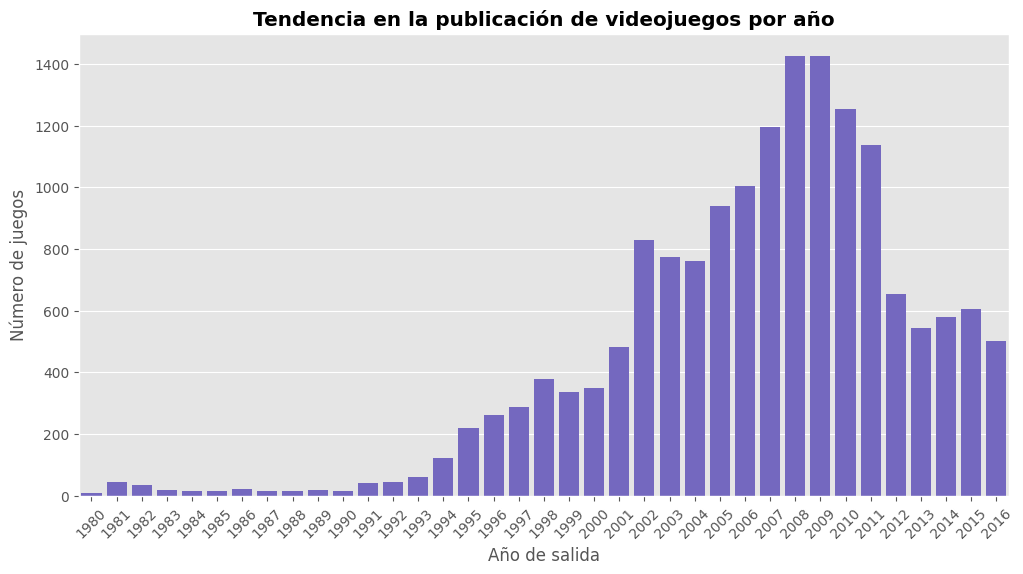

In [10]:
plt.figure (figsize=(12,6))
sns.barplot (
    data=games_per_year,
    x = "year_of_release", 
    y = "total_games",
    color = "slateblue"
)
plt.title ("Tendencia en la publicación de videojuegos por año", fontdict={"weight":"bold"})
plt.xlabel ("Año de salida")
plt.ylabel ("Número de juegos")
plt.xticks (rotation = 45)
plt.show()

### Mayor cantidad de ventas

In [11]:
most_sales = games.groupby ("platform").agg (
    total_sales = ("total_sales", "sum")).sort_values(
    by = "total_sales", ascending = False
    ).reset_index()
most_sales.head(10)

,platform,total_sales
0,PS2,1062.33
1,X360,885.66
2,Wii,828.44
3,PS3,803.97
4,DS,746.86
5,PS,689.95
6,GBA,310.12
7,PS4,265.79
8,PSP,252.63
9,XB,249.02


Podemos observar que las plataformas con mayores ventas son PS2, Xbox 360, Wii, PS3, DS y PS. A partir de la consola PS se nota una disminución en el volumen de ventas, lo cual puede deberse a dos factores principales: que la plataforma sea relativamente nueva y aún no haya alcanzado su punto máximo de popularidad, o que no haya tenido un desempeño comercial tan exitoso.

Por esta razón, se seleccionarán las plataformas con más ventas para realizar el gráfico de dispersión de las ventas por plataforma a lo largo del tiempo, lo que permitirá analizar con mayor detalle su comportamiento y ciclo de vida en el mercado.

In [12]:
platform_name = []
sales_ps = 0
total_sales = 0
for platform, sales in zip(most_sales["platform"], most_sales["total_sales"]): 
    if sales > 600: 
        platform_name.append(platform)
    if platform in ["PS","PS2", "PS3"]: 
        sales_ps += sales
    total_sales += sales
    
print (platform_name)
print ()
print (f"Ventas totales de videojuegos para Play Station: {sales_ps}")
print ()
print (f"Ventas totales de videojuegos por plataforma: {total_sales}") 

['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']

Ventas totales de videojuegos para Play Station: 2556.25

Ventas totales de videojuegos por plataforma: 8122.05


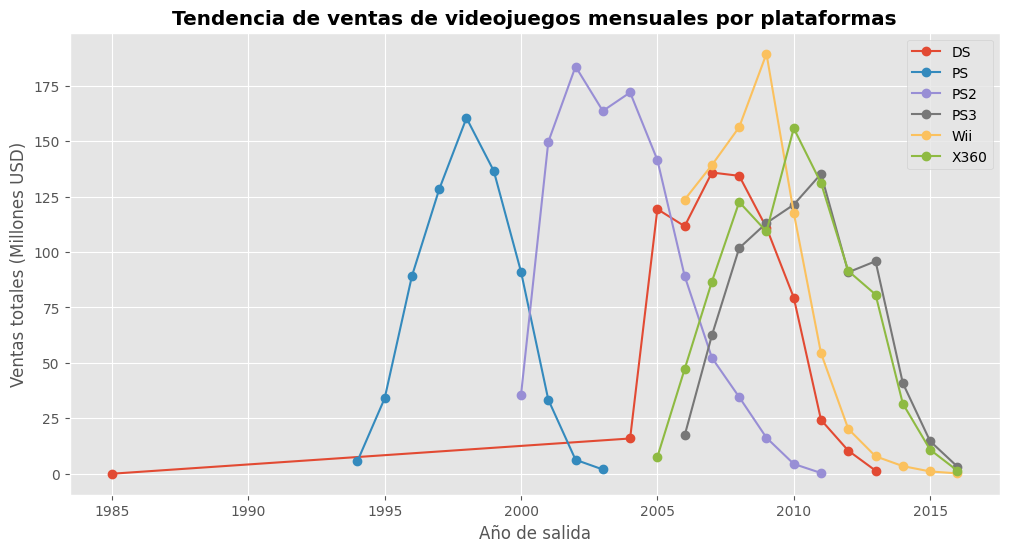

In [13]:
yearly_sales = games.query (
    "platform in @platform_name")

yearly_sales = yearly_sales.groupby (
    ["platform", "year_of_release"], as_index=False).agg(
    total_sales = ("total_sales", "sum")
    )

platform = yearly_sales["platform"].unique ()

plt.figure (figsize= (12,6))
for i, platform in enumerate (platform): 
    subset = yearly_sales [yearly_sales["platform"] == platform]
    plt.plot (subset["year_of_release"], subset["total_sales"], marker = "o", label = platform)

plt.legend()
plt.title ("Tendencia de ventas de videojuegos mensuales por plataformas", fontdict={"weight":"bold"})
plt.xlabel ("Año de salida")
plt.ylabel ("Ventas totales (Millones USD)")
plt.show()

En cuanto a la tendencia de ventas anuales de videojuegos por consola, se observa un dato atípico en la plataforma DS, ya que aparece un registro de ventas en 1985, a pesar de que esta consola fue lanzada oficialmente en 2004. Esto genera un salto en los datos que no tiene justificación aparente y debe considerarse como un error en la base.

Por otro lado, se destaca el papel dominante de PlayStation en el mercado, con sus consolas PS, PS2 y PS3, que en conjunto representan aproximadamente el 31% de las ventas de las plataformas seleccionadas. La estrategia de la marca es clara: cuando una generación comienza a mostrar un descenso en ventas, se introduce una nueva plataforma, lo que impulsa nuevamente el consumo y refuerza su posición en la industria.

En contraste, aunque otras marcas como Nintendo (Wii, DS) o Microsoft (Xbox 360) presentan volúmenes de ventas elevados en determinados periodos, no se observa una estrategia tan marcada para mantener un ciclo de reemplazo continuo que asegure la misma constancia en el liderazgo de ventas totales frente a PlayStation.

### Plataformas Inactivas 

In [14]:
last_year = games["year_of_release"].max()
inactive_platforms = games.groupby("platform")["year_of_release"].agg("max")
inactive_platforms = inactive_platforms[inactive_platforms < last_year]
inactive_platforms

platform
2600    1989
3DO     1995
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PCFX    1996
PS      2003
PS2     2011
PSP     2015
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
Name: year_of_release, dtype: Int64

Si comparamos las plataformas con mayor cantidad de ventas con la lista de plataformas inactivas, podemos observar que algunas fueron muy populares en su momento pero actualmente ya no registran ventas, como es el caso de PS, PS2, DS, GBA, PSP y Xbox. Esto probablemente se deba al surgimiento de nuevas plataformas que transformaron el mercado de los videojuegos e impulsaron a los consumidores a migrar hacia ellas.

### Vida media de las plataformas

In [15]:
platform_lifespan = games.groupby ("platform")["year_of_release"].agg(["min", "max"])
platform_lifespan["duration"] = platform_lifespan["max"] - platform_lifespan["min"]
print (f"La vida media de las plataformas es {round (platform_lifespan["duration"].mean(), 3)}")
print (f"Mediana = {platform_lifespan["duration"].median()}")
print (f"Moda = {platform_lifespan["duration"].mode()[0]}")

La vida media de las plataformas es 7.613
Mediana = 6.0
Moda = 11


### Datos relevante para 2017 

La duración media de las plataformas es de aproximadamente 7,6 años (mediana = 6 años; moda = 11 años). Esto sugiere que el ciclo de vida típico de una consola suele oscilar entre 6 y 8 años. Por lo tanto, para modelar las ventas en 2017 se selecciona como período relevante 2010–2016, ya que abarca la fase final de las consolas de séptima generación y el inicio de las de octava generación.

Este hecho se confirma en la tabla, donde se observa que en 2016 aún se encontraban activas consolas como PS3 y Xbox 360 (séptima generación), al mismo tiempo que plataformas más recientes como PS4 y Xbox One (octava generación). Cabe resaltar que el PC constituye un caso particular, pues es una plataforma atemporal en la que se continúan desarrollando videojuegos sin una limitación clara de ciclo de vida.

Adicionalmente, se descartarán todas las plataformas que no estén activas en 2016, dado que sus ventas no resultan relevantes para el análisis de 2017. Aunque los géneros de videojuegos permanecen relativamente estables, las necesidades y preferencias de los usuarios evolucionan, por lo que no es adecuado incluir datos de plataformas que ya han dejado de ser productivas en el mercado.

In [16]:
active_platforms = games.groupby ("platform", as_index=False)["year_of_release"].max()
active_platforms = active_platforms [active_platforms['year_of_release'] == last_year]
active_platforms = list(active_platforms["platform"])
active_platforms

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

In [17]:
data = games.query ("year_of_release >= 2010 & platform in @active_platforms").reset_index()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            4225 non-null   int64  
 1   name             4225 non-null   object 
 2   platform         4225 non-null   object 
 3   year_of_release  4225 non-null   Int64  
 4   genre            4225 non-null   object 
 5   na_sales         4225 non-null   float64
 6   eu_sales         4225 non-null   float64
 7   jp_sales         4225 non-null   float64
 8   other_sales      4225 non-null   float64
 9   critic_score     2178 non-null   float64
 10  user_score       2382 non-null   float64
 11  rating           4225 non-null   object 
 12  total_sales      4225 non-null   float64
dtypes: Int64(1), float64(7), int64(1), object(4)
memory usage: 433.4+ KB


### Lideres en ventas 

In [19]:
relevant_platforms = data.groupby (
    "platform", as_index=False)["total_sales"].agg (
    "sum").sort_values (
    by = "total_sales", ascending = False
    )
relevant_platforms

,platform,total_sales
7,X360,503.05
2,PS3,502.11
3,PS4,265.79
0,3DS,244.54
5,Wii,204.86
8,XOne,145.05
1,PC,107.89
6,WiiU,76.24
4,PSV,47.38


Como podemos observar, las plataformas líderes en ventas son las de PlayStation, con tres consolas activas en el mercado justo antes de ingresar a 2017: PS3, PS4 y PSV. De igual forma, Xbox gana relevancia gracias a la gran cantidad de ventas acumuladas en sus dos plataformas activas, Xbox 360 y Xbox One. Si bien otras consolas también registran cifras considerables, en comparación con PlayStation y Xbox estas se están quedando atrás en participación de mercado.

### Tendencia para 2017

In [20]:
sales_per_year = data.groupby (
    ["platform", "year_of_release"], as_index=False)["total_sales"].agg(
    "sum"
    )

In [21]:
trend = sales_per_year.groupby ("platform").apply (
    lambda x: np.polyfit (x["year_of_release"], x["total_sales"], 1)[0]
)
trend = trend.reset_index (name = "slope")
print (trend.sort_values ("slope"))

  platform      slope
7     X360 -27.269286
2      PS3 -23.050714
5      Wii -17.003214
0      3DS  -8.565143
1       PC  -3.601071
6     WiiU  -2.900000
4      PSV  -0.606857
8     XOne   2.551000
3      PS4  12.689000


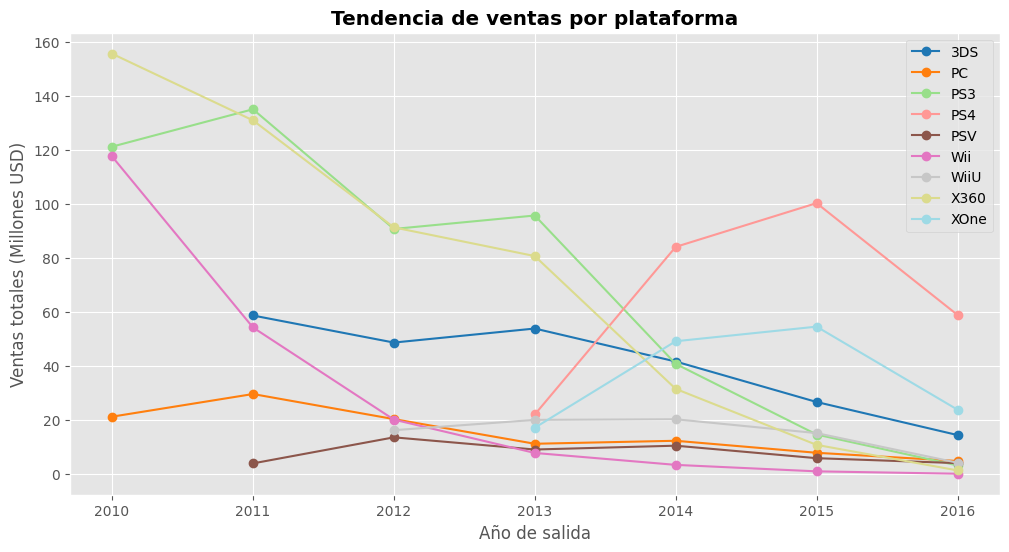

In [22]:
platforms = sales_per_year["platform"].unique ()

colors = cm.get_cmap("tab20", len(platforms))

plt.figure (figsize= (12, 6))

for i, platform in enumerate (platforms): 
    subset = sales_per_year[sales_per_year["platform"] == platform]

    plt.plot (subset["year_of_release"], subset["total_sales"], marker = "o", label = platform, color = colors(i))

plt.legend ()
plt.title ("Tendencia de ventas por plataforma", fontdict= {"weight":"bold"})
plt.xlabel ("Año de salida")
plt.ylabel ("Ventas totales (Millones USD)")
plt.show ()

El gráfico muestra que las únicas plataformas con una **tendencia positiva en ventas** son las consolas de octava generación, en este caso **PS4 y Xbox One**, mientras que las demás presentan una disminución progresiva. Esto sugiere que, de cara al futuro, las consolas con mayor potencial de rentabilidad serán aquellas cuyas ventas mantienen un crecimiento sostenido, como PS4 y Xbox One.

Por otro lado, resulta interesante observar plataformas innovadoras y portátiles como **PSV y WiiU**, cuyas ventas, si bien no son tan altas, no se han visto afectadas de manera tan marcada. Finalmente, el caso del **PC** es particular: se trata de una plataforma atemporal que mantiene su relevancia gracias a la posibilidad de actualizar componentes de hardware, lo que le permite adaptarse a nuevas generaciones de videojuegos sin depender de un ciclo de vida definido.

### Ventas globales por plataformas 

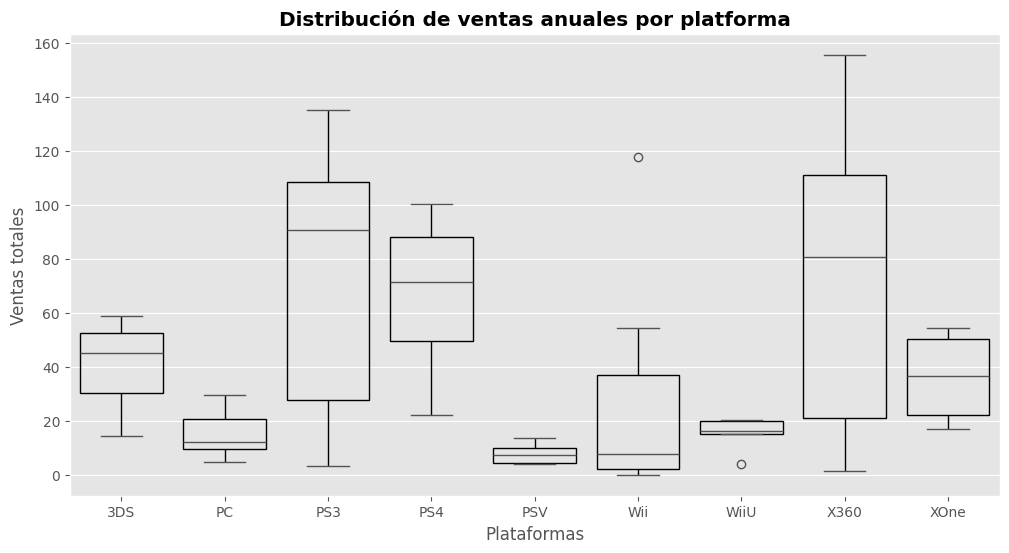

In [23]:
yearly_global = data.groupby (
    ["platform", "year_of_release"], as_index=False)["total_sales"].agg(
    "sum"
    )

plt.figure (figsize=(12,6))
sns.boxplot (
    data = yearly_global, 
    x = "platform", 
    y = "total_sales", 
    boxprops = dict (facecolor = "none", edgecolor = "black"), 
    whiskerprops = dict  (color = "black")
)
plt.title ("Distribución de ventas anuales por platforma", fontdict= {"weight":"bold"})
plt.xlabel ("Plataformas")
plt.ylabel ("Ventas totales")
plt.show ()

Podemos observar que, dentro del periodo y las plataformas analizadas, PS3 y Xbox 360 destacan con las mayores medianas y una amplia dispersión, lo que refleja una gran cantidad de títulos exitosos y varios “hits” de ventas. No obstante, al contrastar con la tendencia observada en gráficos anteriores, es evidente que sus ventas muestran una pendiente negativa, lo que sugiere que en los años siguientes estas plataformas no representarán un volumen significativo en el mercado.

En el caso de 3DS y Xbox One, ambas presentan medianas moderadas y un desempeño aceptable, aunque sin llegar al dominio de PS3 y Xbox 360. Sin embargo, sus tendencias también evidencian una disminución pronunciada en las ventas anuales, lo que proyecta un pronóstico poco favorable para su evolución futura.

Por otro lado, plataformas de menor desempeño como PC, PSV y WiiU muestran medianas bajas y un rango intercuartílico reducido, lo que indica ventas más consistentes pero limitadas. Aun así, a diferencia de las plataformas previamente mencionadas, su tendencia de ventas no presenta caídas tan marcadas, lo que podría representar una estabilidad relativa e incluso un pronóstico más alentador en el mediano plazo.

Un caso particular es Wii, que si bien presenta una mediana baja, evidencia un outlier extraordinario asociado a un año icónico en ventas gracias a un título excepcionalmente exitoso.

En síntesis: aunque PS3 y Xbox 360 fueron las plataformas más exitosas en ventas globales de videojuegos, su declive proyecta menor relevancia a futuro. En contraste, resultan más atractivas las plataformas que mantienen estabilidad en sus ventas, como PS4, Xbox One, PSV, WiiU y PC, ya que ofrecen un panorama más sostenible a largo plazo.

### Influencia en puntaje sobre ventas 

In [24]:
ps4_sales = data.query ("platform == 'PS4'")

In [25]:
ps4_sales[["total_sales", "user_score", "critic_score"]].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031261,0.405887
user_score,-0.031261,1.000000,0.557654
critic_score,0.405887,0.557654,1.000000


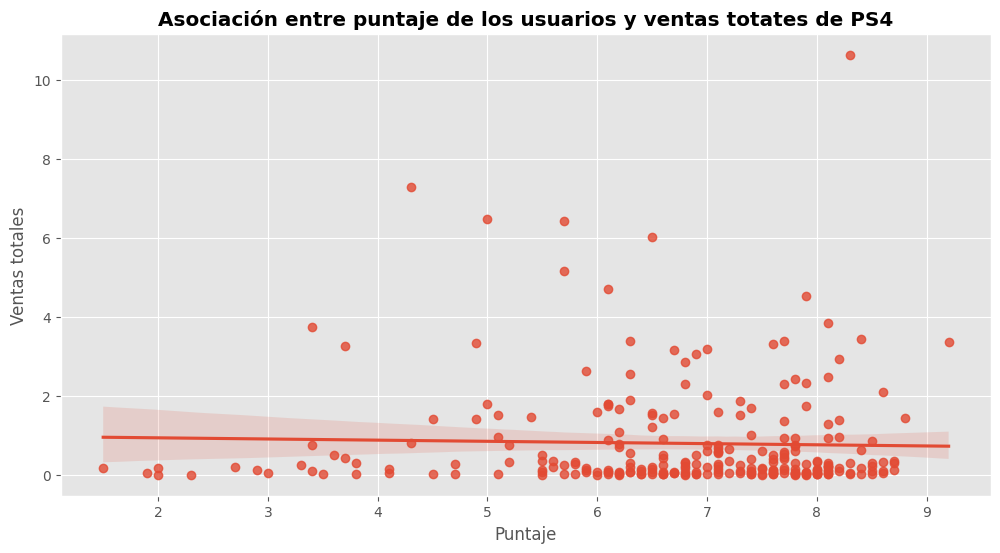

In [26]:
plt.figure (figsize=(12, 6))
sns.regplot (
    data = ps4_sales, 
    x = "user_score", 
    y = "total_sales"
)
plt.title ("Asociación entre puntaje de los usuarios y ventas totates de PS4", fontdict={"weight": "bold"})
plt.xlabel ("Puntaje")
plt.ylabel ("Ventas totales")
plt.show ()

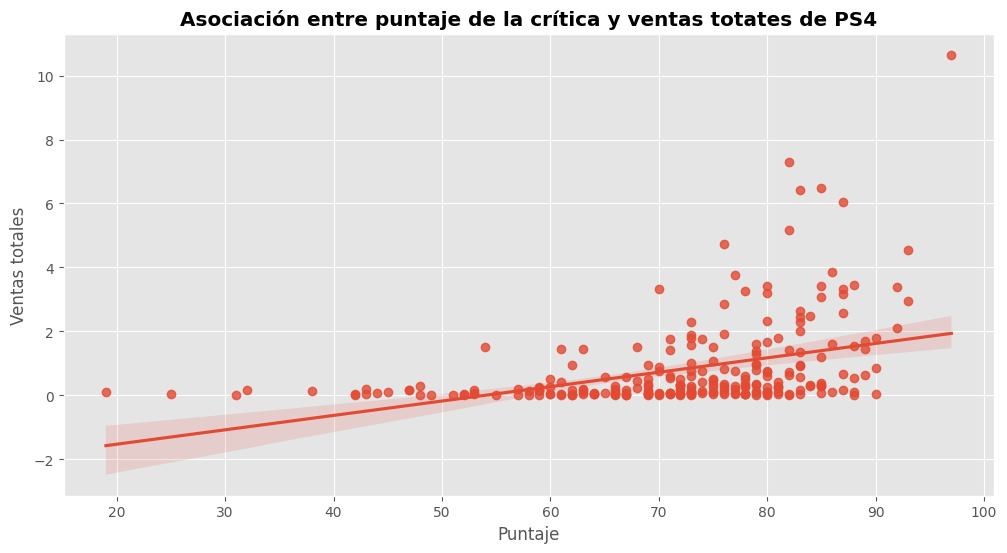

In [27]:
plt.figure (figsize=(12,6))
sns.regplot (
    data = ps4_sales, 
    x = "critic_score",
    y = "total_sales"
)
plt.title ("Asociación entre puntaje de la crítica y ventas totates de PS4", fontdict= {"weight":"bold"})
plt.xlabel ("Puntaje")
plt.ylabel ("Ventas totales")
plt.show ()

Al observar los valores de correlación, se concluye que el puntaje de los usuarios no presenta una relación significativa con las ventas totales de videojuegos en PS4, dado que su valor de correlación es de -0.03, lo cual indica ausencia de asociación lineal.

En contraste, el puntaje de la crítica muestra una correlación moderada y positiva con las ventas (valor de 0.41). Esto sugiere que, aunque no es un factor determinante, las valoraciones de la crítica sí pueden influir en cierta medida en el desempeño comercial de los títulos de PS4.

En síntesis, se puede afirmar que ninguno de los puntajes ejerce una influencia decisiva sobre las ventas, aunque las calificaciones de la crítica parecen tener un impacto más relevante que las otorgadas por los usuarios.

### Influencia en puntaje sobre ventas de otras plataformas 

Teniendo en cuenta que el proyecto presenta un salto lógico al pasar del análisis de correlación entre puntaje y ventas totales, hacia la comparación de ventas de juegos por plataforma, considero que lo más coherente es suponer que lo que se busca en este punto es extender el análisis de correlación entre puntajes y ventas a otras plataformas, manteniendo así la continuidad con la sección anterior.

In [28]:
one_sales = data.query ("platform == 'XOne'")

In [29]:
one_sales [["total_sales", "user_score", "critic_score"]].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068804,0.417206
user_score,-0.068804,1.000000,0.472462
critic_score,0.417206,0.472462,1.000000


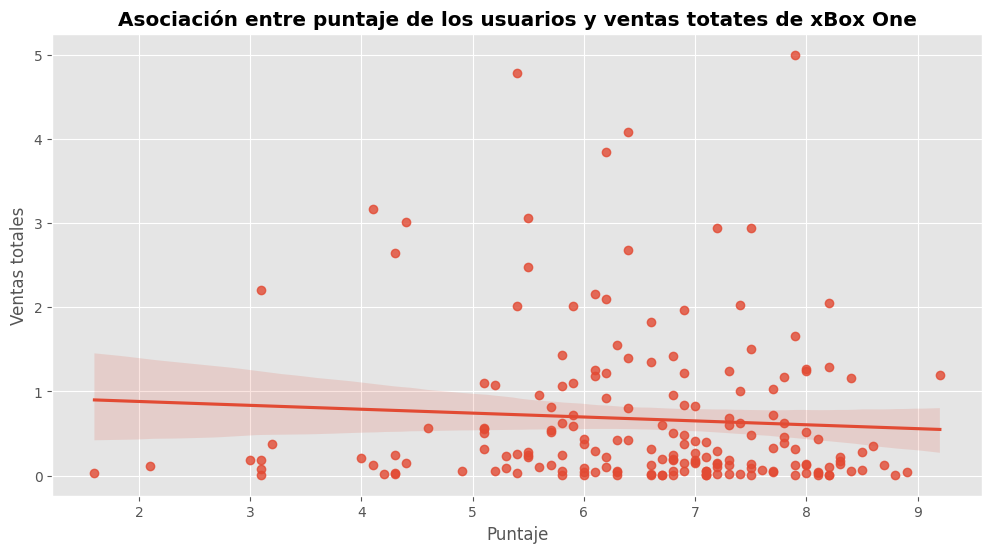

In [30]:
plt.figure (figsize= (12,6))
sns.regplot (
    data = one_sales, 
    x = "user_score", 
    y = "total_sales"
)

plt.title ("Asociación entre puntaje de los usuarios y ventas totates de xBox One", fontdict={"weight": "bold"})
plt.xlabel ("Puntaje")
plt.ylabel ("Ventas totales")
plt.show ()

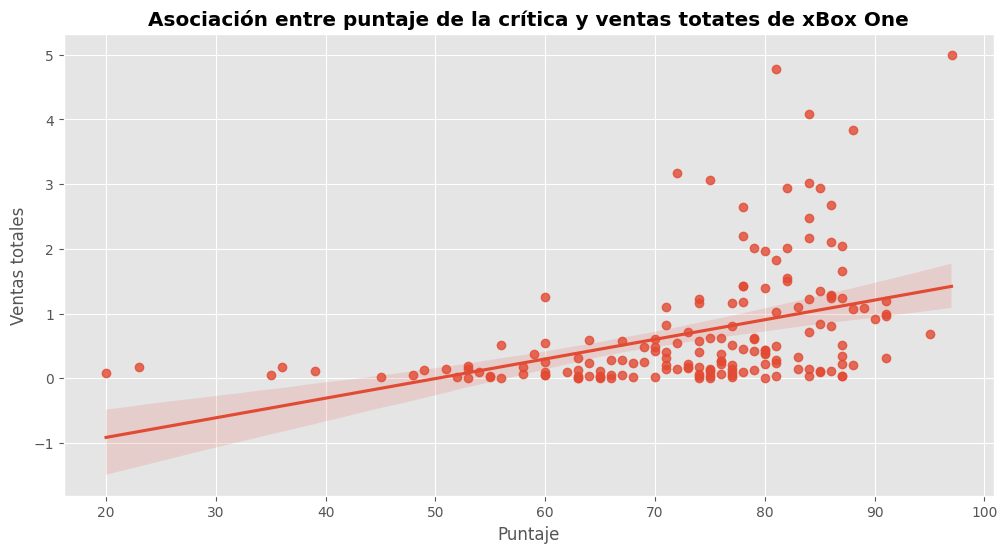

In [31]:
plt.figure (figsize= (12,6))
sns.regplot (
    data = one_sales, 
    x = "critic_score", 
    y = "total_sales"
)

plt.title ("Asociación entre puntaje de la crítica y ventas totates de xBox One", fontdict={"weight": "bold"})
plt.xlabel ("Puntaje")
plt.ylabel ("Ventas totales")
plt.show ()

En Xbox One, las ventas de videojuegos no están influenciadas por los puntajes de los usuarios, pero sí muestran una relación moderada con los puntajes de la crítica. Al igual que en PS4, esto indica que los juegos mejor valorados por la crítica tienden a vender más, aunque esta relación no es lo suficientemente fuerte como para considerarla el único factor explicativo de las ventas.

### Géneros de videojuegos más rentables 

In [32]:
genre = data.groupby (
    "genre", as_index= False).agg (
    number_of_games = ("name", "count"), total_sales = ("total_sales", "sum")).sort_values (
    by = "total_sales", ascending = False
    )
genre

,genre,number_of_games,total_sales
0,Action,1286,560.70
8,Shooter,398,420.88
10,Sports,497,276.32
7,Role-Playing,437,237.23
3,Misc,426,193.42
6,Racing,222,103.78
4,Platform,130,102.43
2,Fighting,169,68.50
9,Simulation,154,56.72
1,Adventure,324,41.87


In [33]:
sales_genre = data.groupby (
    ["genre", "year_of_release"], as_index = False)["total_sales"].agg("sum")

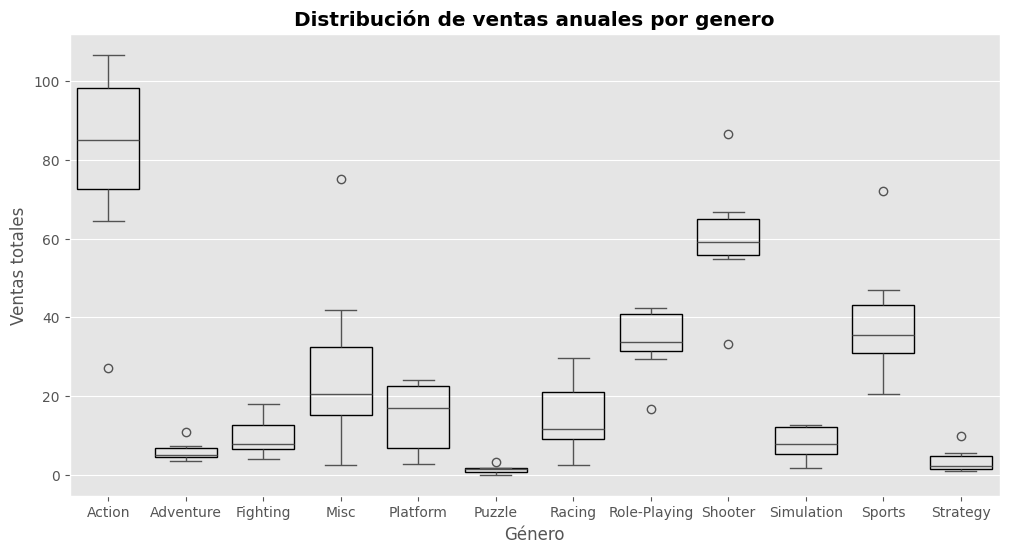

In [34]:
plt.figure (figsize= (12, 6))
sns.boxplot (
    data = sales_genre, 
    x = "genre", 
    y = "total_sales", 
    boxprops = dict (facecolor = "none", edgecolor = "black")
)

plt.title ("Distribución de ventas anuales por genero", fontdict= {"weight":"bold"})
plt.xlabel ("Género")
plt.ylabel ("Ventas totales")
plt.show ()

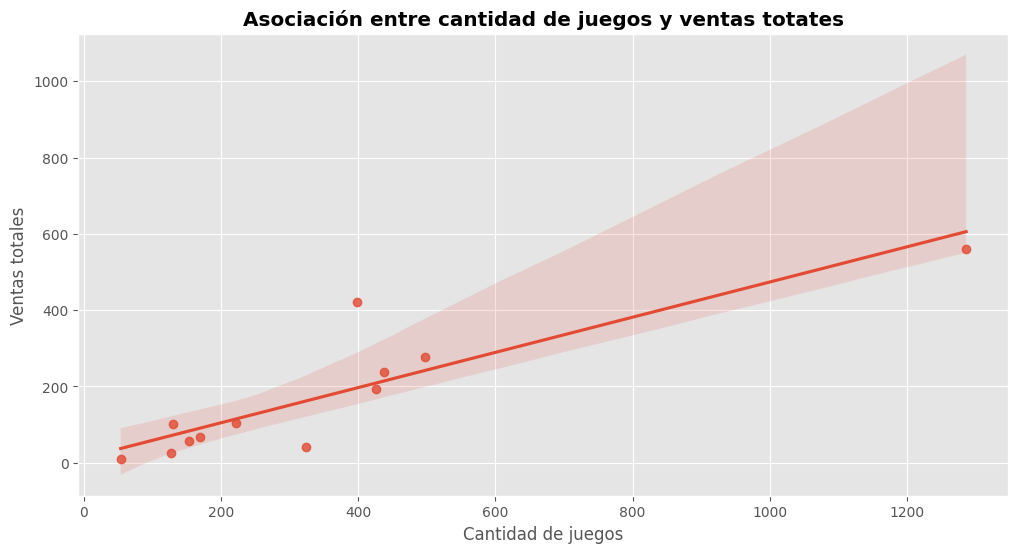

In [35]:
plt.figure (figsize=(12,6))
sns.regplot (
    data = genre, 
    x = "number_of_games", 
    y = "total_sales"
)
plt.title ("Asociación entre cantidad de juegos y ventas totates", fontdict= {"weight":"bold"})
plt.xlabel ("Cantidad de juegos")
plt.ylabel ("Ventas totales")
plt.show ()

A primera vista, los géneros parecen influir en el nivel de ventas, siendo Acción, Shooter, Rol y Deportes los más destacados en términos de ventas totales. Sin embargo, al profundizar, se observa que estas cifras elevadas no necesariamente se deben únicamente a la popularidad intrínseca del género, sino también a la cantidad de juegos desarrollados dentro de cada uno.

La gráfica de dispersión refuerza este hallazgo: existe una correlación muy fuerte y positiva entre el número de juegos publicados y las ventas totales. Esto indica que, en gran medida, las ventas de un género están determinadas por la oferta de títulos disponibles, más que por el género en sí mismo.

Por otra parte, el boxplot por género muestra que géneros como Acción y Shooter no solo acumulan altas ventas totales, sino que además presentan años específicos con picos de ventas extraordinariamente altos (outliers positivos). Esto sugiere que en ciertos periodos se lanzaron títulos que impulsaron significativamente las ventas de todo el género. En contraste, géneros como Puzzle o Estrategia exhiben ventas bajas y un rango reducido, sin años con grandes éxitos que marquen la diferencia.

En conclusión, aunque el género influye parcialmente en las ventas, el verdadero motor parece estar en la cantidad de juegos publicados y en la presencia de años clave con lanzamientos sobresalientes que marcan picos en la trayectoria de cada categoría.

# 8. Perfil de usuario por región

### Plataformas principales NA

In [36]:
na = data.groupby (["platform", "year_of_release"], as_index=False)["na_sales"].agg("sum")

In [37]:
na_sales = na.groupby ("platform", as_index=False)["na_sales"].agg("sum")
print (na_sales.sort_values("na_sales", ascending = False))

  platform  na_sales
7     X360    334.18
2      PS3    229.25
5      Wii    121.20
3      PS4    108.74
8     XOne     93.12
0      3DS     82.65
1       PC     39.07
6     WiiU     38.10
4      PSV     12.47


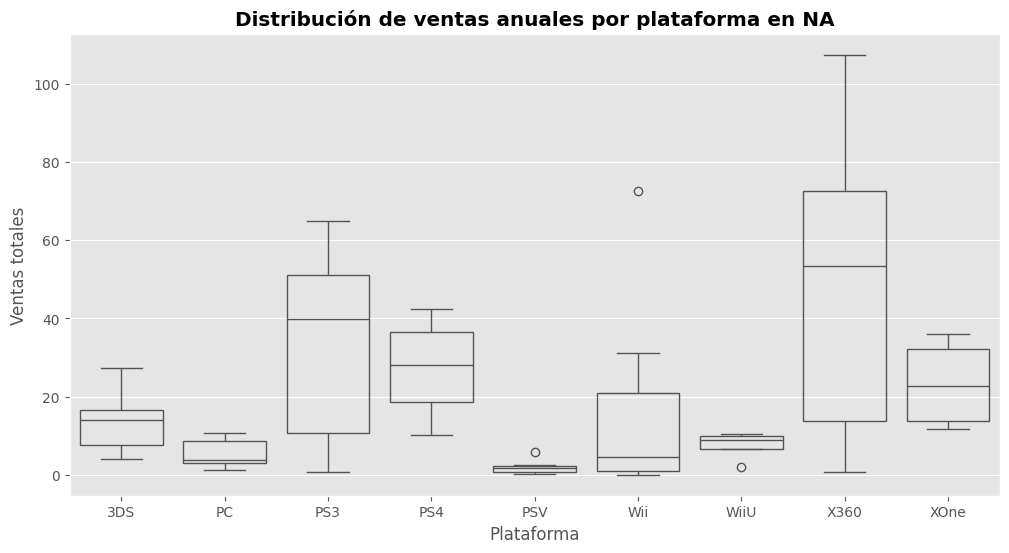

In [38]:
plt.figure (figsize= (12,6))
sns.boxplot (
    data = na, 
    x = "platform", 
    y = "na_sales",
    boxprops = dict (facecolor = "none")
)
plt.title ("Distribución de ventas anuales por plataforma en NA", fontdict= {"weight":"bold"})
plt.xlabel ("Plataforma")
plt.ylabel ("Ventas totales")
plt.show ()

In [39]:
trend_na = na.groupby ("platform").apply (
    lambda x: np.polyfit (x["year_of_release"], x["na_sales"], 1)[0]
)
trend_na = trend_na.reset_index (name = "slope")
print (trend_na.sort_values ("slope"))

  platform      slope
7     X360 -18.463929
2      PS3 -11.579643
5      Wii -10.300000
0      3DS  -4.344286
6     WiiU  -1.667000
1       PC  -1.599643
4      PSV  -0.682571
8     XOne   1.232000
3      PS4   4.170000


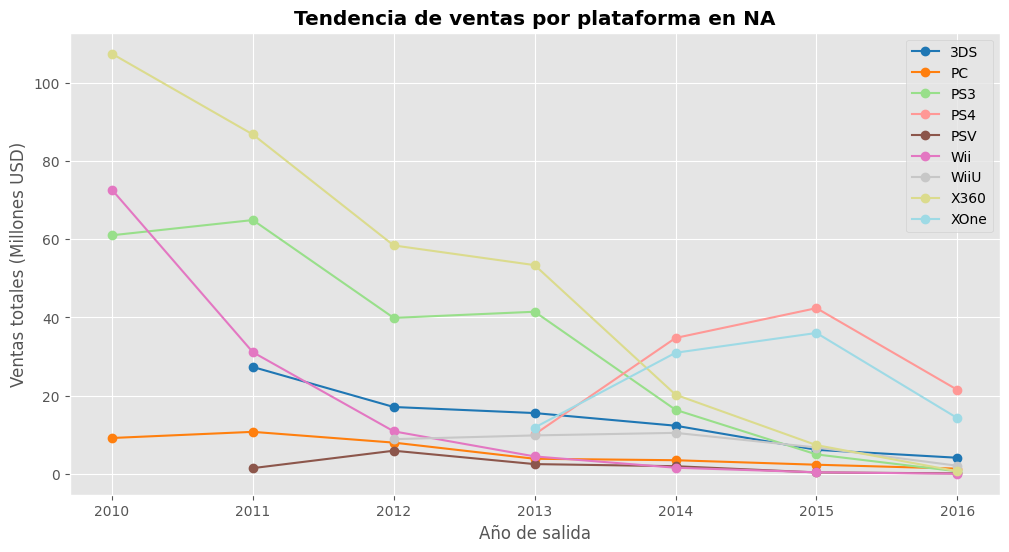

In [40]:
na_platform = na["platform"].unique ()

plt.figure (figsize= (12,6))
for i, platform in enumerate (na_platform): 
    subset = na[na["platform"] == platform]
    plt.plot (subset["year_of_release"], subset["na_sales"], marker = "o", label = platform, color = colors (i))

plt.legend ()
plt.title ("Tendencia de ventas por plataforma en NA", fontdict= {"weight":"bold"})
plt.xlabel ("Año de salida")
plt.ylabel ("Ventas totales (Millones USD)")
plt.show ()

### Plataformas principales EU

In [41]:
eu = data.groupby (["platform", "year_of_release"], as_index= False)["eu_sales"].agg("sum")

In [42]:
eu_sales = eu.groupby ("platform", as_index=False)["eu_sales"].agg("sum")
print (eu_sales.sort_values("eu_sales", ascending = False))

  platform  eu_sales
2      PS3    213.60
7     X360    163.41
3      PS4    141.09
1       PC     68.82
5      Wii     65.91
0      3DS     61.27
8     XOne     51.59
6     WiiU     25.13
4      PSV     13.07


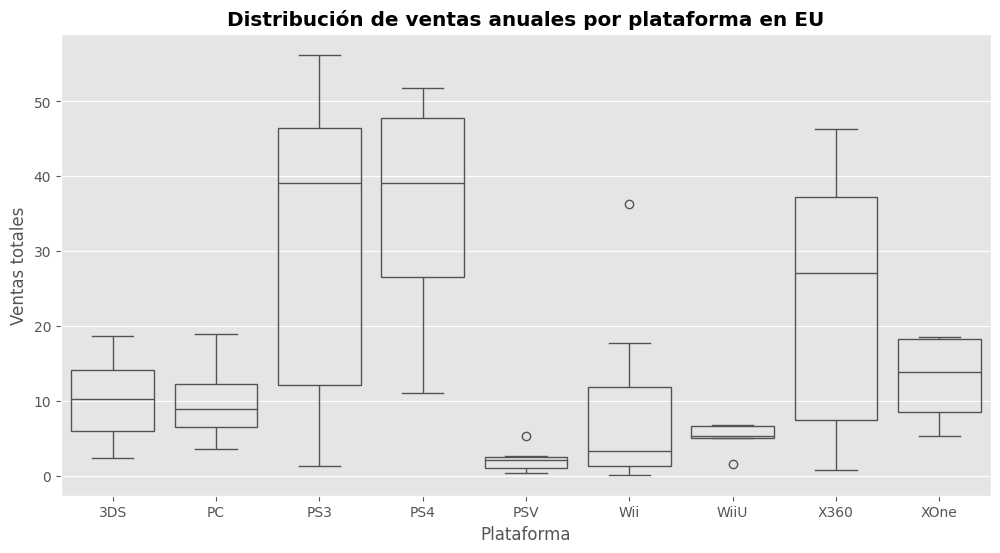

In [43]:
plt.figure (figsize = (12,6)) 
sns.boxplot (
    data = eu, 
    x = "platform", 
    y = "eu_sales", 
    boxprops = dict (facecolor = "none")
)
plt.title ("Distribución de ventas anuales por plataforma en EU", fontdict= {"weight":"bold"})
plt.xlabel ("Plataforma")
plt.ylabel ("Ventas totales")
plt.show ()

In [44]:
trend_eu = eu.groupby ("platform").apply (
    lambda x : np.polyfit (x["year_of_release"], x["eu_sales"], 1)[0]
)
trend_eu = trend_eu.reset_index (name = "slope")
print (trend_eu.sort_values ("slope"))

  platform     slope
2      PS3 -9.604643
7     X360 -8.417143
5      Wii -5.244643
0      3DS -3.070571
1       PC -2.001429
6     WiiU -0.929000
4      PSV -0.583714
8     XOne  1.319000
3      PS4  6.745000


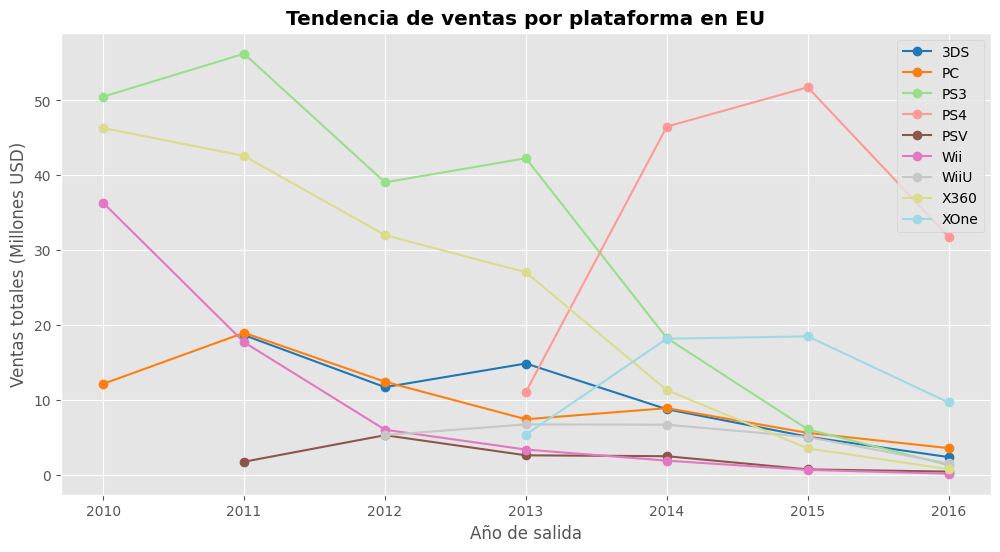

In [45]:
eu_platform = eu["platform"].unique ()

plt.figure (figsize = (12, 6))

for i, platform in enumerate (eu_platform): 
    subset = eu[eu["platform"] == platform]
    plt.plot (subset["year_of_release"], subset["eu_sales"], marker = "o", color = colors(i), label = platform)

plt.legend ()
plt.title ("Tendencia de ventas por plataforma en EU", fontdict= {"weight":"bold"})
plt.xlabel ("Año de salida")
plt.ylabel ("Ventas totales (Millones USD)")
plt.show ()

### Plataformas principales JP

In [46]:
jp = data.groupby (["platform", "year_of_release"], as_index = False)["jp_sales"].agg("sum")

In [47]:
jp_sales = jp.groupby ("platform", as_index=False)["jp_sales"].agg("sum")
print (jp_sales.sort_values ("jp_sales", ascending = False))

  platform  jp_sales
0      3DS    100.62
2      PS3     59.26
4      PSV     21.84
5      Wii     17.75
3      PS4     15.96
6     WiiU     13.01
7     X360      5.46
8     XOne      0.34
1       PC      0.00


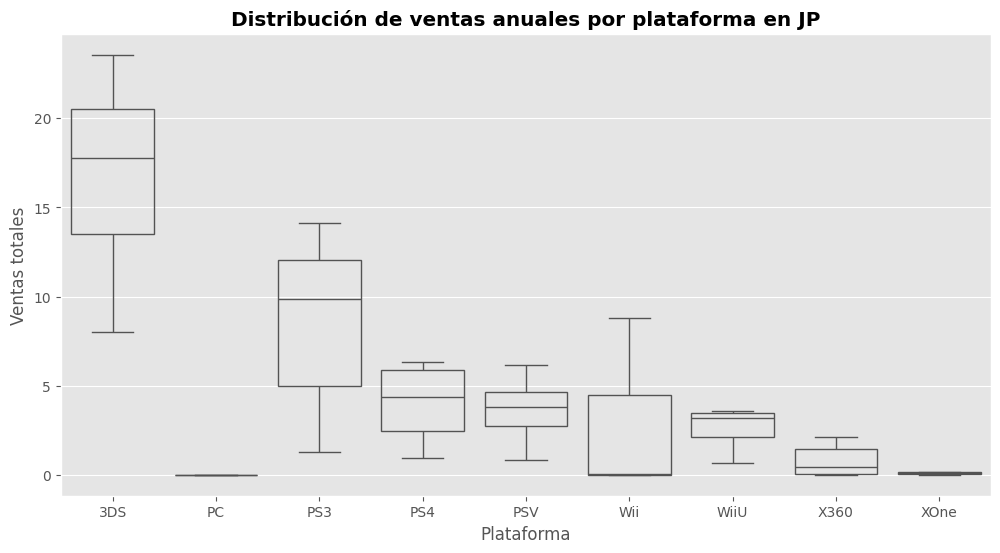

In [48]:
plt.figure (figsize= (12,6))
sns.boxplot (
    data = jp, 
    x = "platform", 
    y = "jp_sales", 
    boxprops = dict (facecolor = "none")
)
plt.title ("Distribución de ventas anuales por plataforma en JP", fontdict= {"weight":"bold"})
plt.xlabel ("Plataforma")
plt.ylabel ("Ventas totales")
plt.show ()

In [49]:
trend_jp = jp.groupby ("platform").apply (
    lambda x: np.polyfit (x["year_of_release"], x["jp_sales"], 1)[0]
)
trend_jp = trend_jp.reset_index (name = "slope")
print (trend_jp.sort_values ("slope"))

  platform         slope
2      PS3 -1.866429e+00
5      Wii -1.458571e+00
0      3DS -1.150286e+00
7     X360 -3.882143e-01
6     WiiU -3.040000e-01
1       PC  0.000000e+00
8     XOne  8.464719e-15
4      PSV  6.594286e-01
3      PS4  1.774000e+00


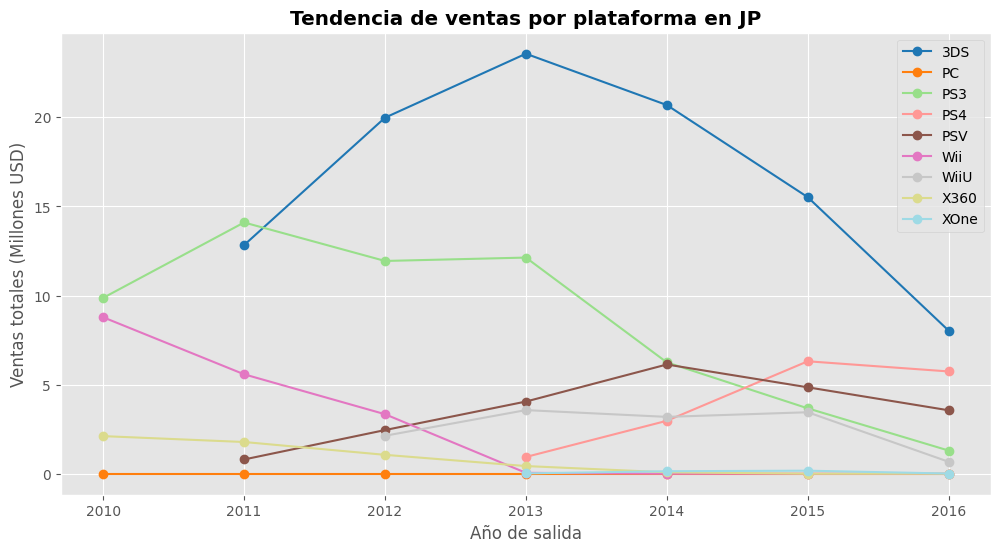

In [50]:
jp_platform = jp["platform"].unique ()

plt.figure (figsize=(12,6))

for i, platform in enumerate (jp_platform): 
    subset = jp[jp["platform"] == platform]
    plt.plot (subset["year_of_release"], subset["jp_sales"], marker = "o", color = colors(i), label = platform)

plt.legend()
plt.title ("Tendencia de ventas por plataforma en JP", fontdict= {"weight":"bold"})
plt.xlabel ("Año de salida")
plt.ylabel ("Ventas totales (Millones USD)")
plt.show ()

📍 **Norteamérica (NA)**

- **Líder en ventas acumuladas:** Xbox 360, seguida de PS3, Wii y en menor medida PS4 y Xbox One.

- **Distribución anual:** Xbox 360 muestra mayor dispersión de ventas y presencia de valores atípicos altos. PS3 y PS4 tienen una distribución más concentrada y estable.

- **Tendencia:** Plataformas de séptima generación (X360, PS3, Wii) van en declive, con pendientes negativas. En contraste, PS4 y Xbox One muestran pendiente positiva, consolidándose como las plataformas con mayor proyección para 2017.

- **Insight clave:** La preferencia por Xbox es marcada en esta región (efecto de origen y posicionamiento), pero PS4 y Xbox One tienen potencial de crecimiento por estar en ciclo de vida temprano.

📍 **Europa (EU)**

- **Líder en ventas acumuladas:** PS3, seguida de Xbox 360 y PS4. El PC aparece con mucha más fuerza que en NA.

- **Distribución anual:** PS3 y PS4 tienen rangos amplios y medianas elevadas, lo que indica consistencia en ventas.

- **Tendencia:** Al igual que en NA, las consolas de séptima generación decaen, mientras que PS4 y Xbox One crecen (PS4 con mayor fuerza, pendiente positiva destacada).

- **Insight clave:** Europa es un mercado más abierto al gaming en PC y mantiene una fuerte base en PlayStation. PS4 tiene las mejores proyecciones.

📍 **Japón (JP)**

- **Líder en ventas acumuladas:** 3DS domina ampliamente, seguida de PS3 y PSV.

- **Distribución anual:** 3DS muestra la mayor concentración de ventas en torno a valores altos, mientras que PS3 tiene una distribución amplia pero decreciente.

- **Tendencia:** Las portátiles tienen más peso en Japón. La 3DS lidera hasta 2015 pero comienza a decaer; PS Vita mantiene relevancia moderada. PS4 muestra pendiente positiva, lo que indica oportunidad de crecimiento. Xbox prácticamente no tiene presencia.

- **Insight clave:** Japón es un mercado muy distinto, dominado por consolas portátiles y marcas locales (Nintendo, Sony). PS4 podría crecer como sustituto natural de PS3 y Wii, pero sin desplazar a portátiles en el corto plazo.

🌍 **Conclusión global**

**NA:** Xbox 360 sigue siendo la más influyente históricamente, pero el futuro lo tienen PS4 y Xbox One.

**EU:** PS3 lideró, pero PS4 está consolidándose como la nueva plataforma dominante. PC mantiene un rol importante.

**JP:** Predominio de portátiles (3DS, PSV), con PS4 como la consola de sobremesa con mayor proyección.

👉 **Estrategia de ventas recomendada:**

**NA y EU:** enfocarse en PS4 y Xbox One como plataformas emergentes, con campañas que refuercen su adopción.

**JP:** priorizar portátiles (3DS, PSV) y fortalecer presencia de PS4 como opción de sobremesa.

**Global:** unificar esfuerzos en PS4, ya que es la única plataforma con pendiente positiva en todas las regiones principales, mientras que las demás muestran declive o estancamiento. 

### Géneros principales NA

In [51]:
genre_na = data.groupby (
    "genre", as_index=False)["na_sales"].sum().sort_values (
    "na_sales", ascending=False).reset_index(drop = True)
genre_na.head()

,genre,na_sales
0,Action,274.66
1,Shooter,235.98
2,Sports,151.77
3,Misc,114.36
4,Role-Playing,98.14


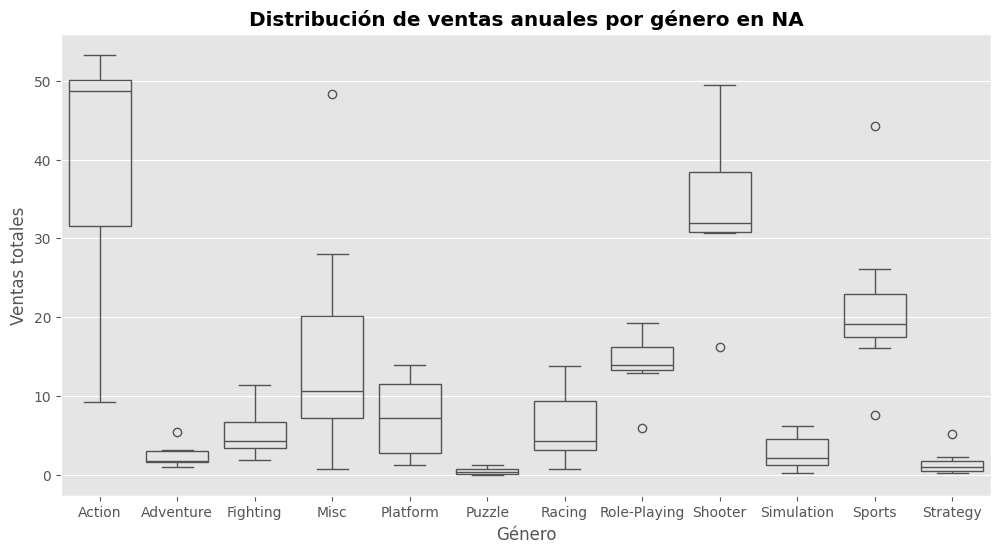

In [52]:
na_genre = data.groupby (
    ["genre", "year_of_release"], as_index=False)["na_sales"].sum()

plt.figure (figsize=(12,6))
sns.boxplot (
    data = na_genre, 
    x = "genre", 
    y = "na_sales", 
    boxprops = dict (facecolor = "none")
)

plt.title ("Distribución de ventas anuales por género en NA", fontdict= {"weight":"bold"})
plt.xlabel ("Género")
plt.ylabel ("Ventas totales")
plt.show ()

### Géneros principales EU

In [53]:
genre_eu = data.groupby(
    "genre", as_index= False)["eu_sales"].sum().sort_values (
    "eu_sales", ascending = False).reset_index(drop = True)
genre_eu.head()

,genre,eu_sales
0,Action,224.26
1,Shooter,171.04
2,Sports,113.14
3,Role-Playing,69.02
4,Misc,60.79


<Axes: xlabel='genre', ylabel='eu_sales'>

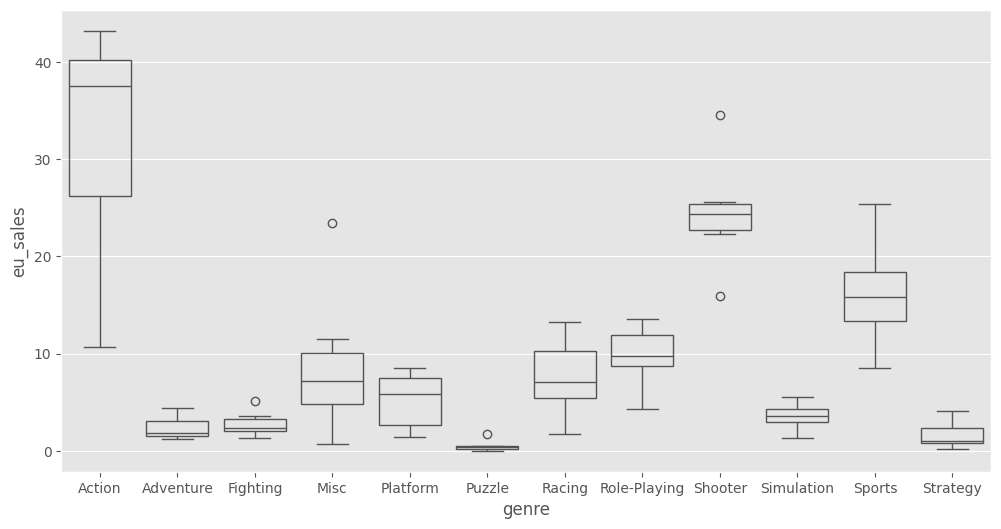

In [54]:
eu_genre = data.groupby (
    ["genre", "year_of_release"], as_index = False)["eu_sales"].sum()

plt.figure (figsize = (12,6))
sns.boxplot (
    data = eu_genre, 
    x = "genre", 
    y = "eu_sales",
    boxprops = dict (facecolor = "none")
)

### Géneros principales JP

In [55]:
genre_jp = data.groupby (
    "genre", as_index = False)["jp_sales"].sum().sort_values (
    "jp_sales", ascending = False).reset_index (drop = True)
genre_jp.head()

,genre,jp_sales
0,Role-Playing,70.07
1,Action,61.78
2,Misc,18.27
3,Platform,15.25
4,Shooter,13.86


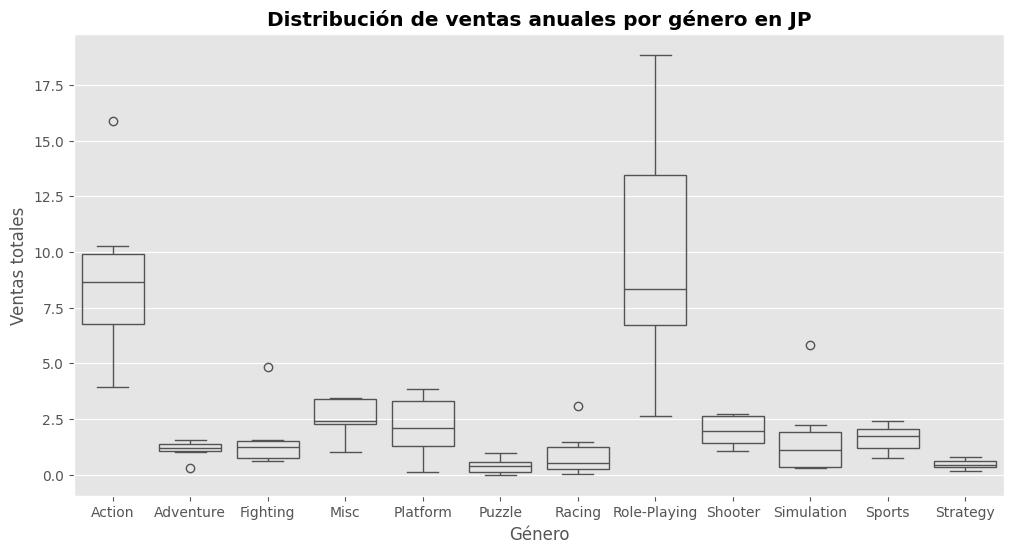

In [56]:
jp_genre = data.groupby (
    ["genre", "year_of_release"], as_index = False)["jp_sales"].sum()

def box (data, x, y, title, x_label, y_label): 
    plt.figure (figsize = (12,6))
    sns.boxplot (
        data = data, 
        x = x, 
        y = y, 
        boxprops = dict (facecolor = "none")
    )

    plt.title (title, fontdict = {"weight":"bold"})
    plt.xlabel (x_label)
    plt.ylabel (y_label)
    plt.show ()

box (jp_genre, "genre", "jp_sales", "Distribución de ventas anuales por género en JP", "Género", "Ventas totales")

### Ventas según clasificación en NA

In [57]:
class_na = data.groupby (
    "rating").agg (cantidad = ("name", "count"), na_sales = ("na_sales", "sum")).sort_values (
    "na_sales", ascending = False).reset_index()
class_na

,rating,cantidad,na_sales
0,M,708,380.94
1,E,726,241.65
2,T,789,154.95
3,E10+,515,146.09
4,unknown,1482,134.44
5,EC,4,0.71
6,RP,1,0.00


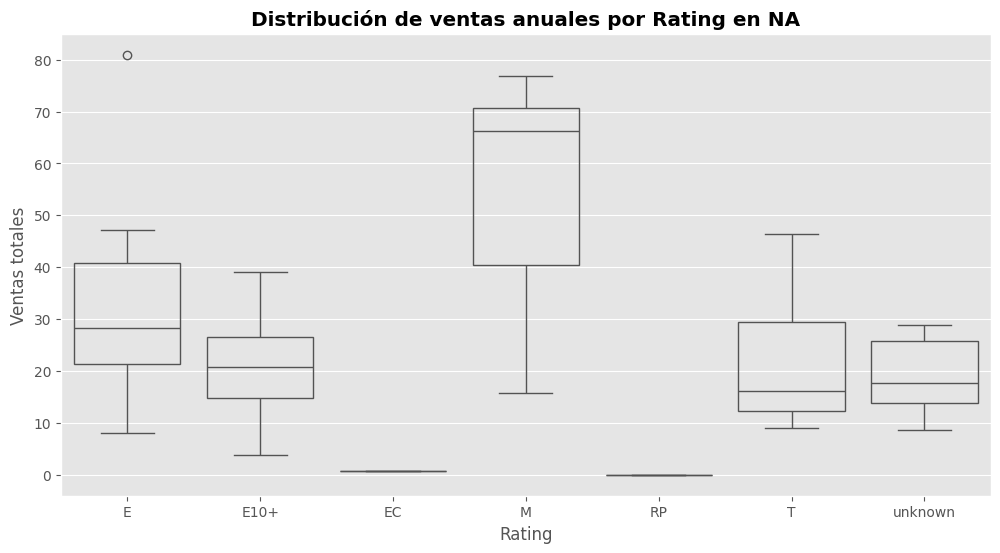

In [58]:
na_class = data.groupby (
    ["rating", "year_of_release"], as_index= False)["na_sales"].sum()
box (na_class, "rating", "na_sales", "Distribución de ventas anuales por Rating en NA", "Rating", "Ventas totales")

### Ventas según clasificación en EU

In [59]:
class_eu = data.groupby (
    "rating").agg (cantidad = ("name", "count"), eu_sales = ("eu_sales", "sum")).sort_values (
    "eu_sales", ascending = False).reset_index ()
class_eu

,rating,cantidad,eu_sales
0,M,708,291.03
1,E,726,182.30
2,unknown,1482,126.93
3,T,789,110.61
4,E10+,515,92.99
5,RP,1,0.03
6,EC,4,0.00


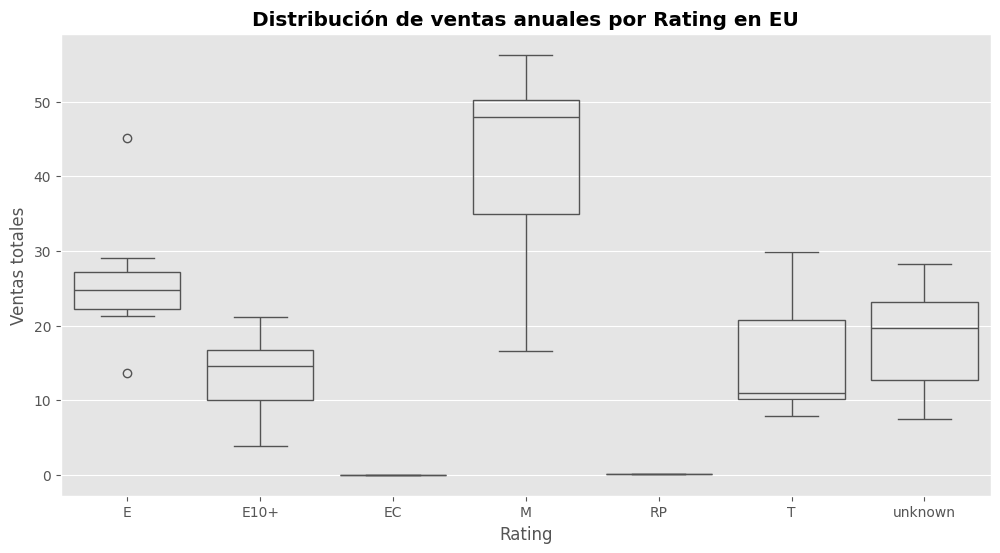

In [60]:
eu_class = data.groupby (
    ["rating", "year_of_release"], as_index= False)["eu_sales"].sum()
box (eu_class, "rating", "eu_sales", "Distribución de ventas anuales por Rating en EU", "Rating", "Ventas totales")

### Ventas según clasificación en JP

In [61]:
class_jp = data.groupby (
    "rating").agg (cantidad = ("name", "count"), jp_sales = ("jp_sales", "sum")).sort_values (
    "jp_sales", ascending = False).reset_index ()
class_jp

,rating,cantidad,jp_sales
0,unknown,1482,114.76
1,E,726,42.38
2,T,789,36.09
3,M,708,29.79
4,E10+,515,11.22
5,EC,4,0.00
6,RP,1,0.00


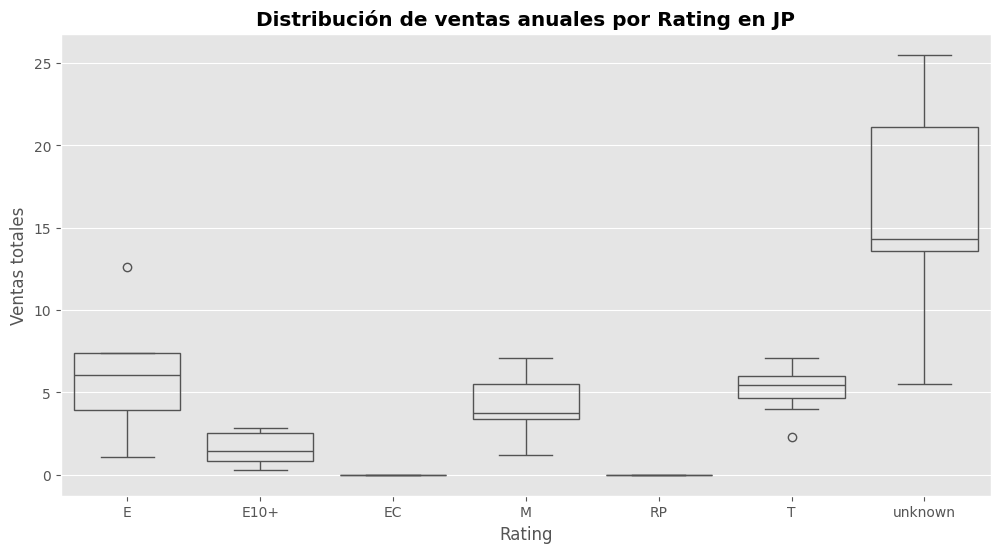

In [62]:
na_class = data.groupby (
    ["rating", "year_of_release"], as_index= False)["jp_sales"].sum()
box (na_class, "rating", "jp_sales", "Distribución de ventas anuales por Rating en JP", "Rating", "Ventas totales")

📍 **Norteamérica (NA)**

Los juegos con clasificación M (Mature) concentran las mayores ventas totales (≈381M), seguidos de cerca por E (Everyone) (≈242M).

La clasificación T (Teen) también aporta ventas importantes (≈155M).

Los juegos con unknown representan una cantidad muy alta de títulos (1482), pero su volumen de ventas (≈134M) es menor comparado con las categorías principales, lo que indica que muchos de esos juegos no alcanzaron un alto desempeño comercial.

Los boxplots muestran que M tiene la mayor dispersión, con títulos que alcanzan ventas anuales muy altas, lo que confirma que en NA existe preferencia clara hacia juegos con clasificación más madura.

**Conclusión NA:** Existe un efecto de la clasificación en las ventas: las categorías M, E y T dominan el mercado, siendo M la que concentra los mayores picos de ventas.

📍 **Europa (EU)**

Similar a NA, M lidera en ventas totales (≈291M), seguido de E (≈182M) y unknown (≈127M).

La categoría T tiene un rol más reducido en comparación con NA (≈111M).

El boxplot confirma que los juegos M son los más vendidos, con amplia dispersión y valores atípicos altos.

En cambio, las categorías como E10+ o EC casi no influyen en el mercado.

**Conclusión EU:** La preferencia está aún más marcada hacia juegos con clasificación Mature, lo que sugiere que el público europeo consume principalmente títulos orientados a jugadores adultos.

📍 **Japón (JP)**

Aquí el patrón es diferente: la categoría con más ventas es unknown (≈115M). Esto sugiere que muchos títulos comercializados en Japón no cuentan con clasificación ESRB (posiblemente porque usan el sistema CERO japonés).

Entre los ratings ESRB, el más destacado es E (≈42M), seguido de T (≈37M) y M (≈30M), pero en volúmenes muy inferiores a NA y EU.

El boxplot confirma que unknown domina en dispersión y mediana de ventas.

**Conclusión JP:** La clasificación ESRB tiene poca relevancia en Japón. El peso de unknown evidencia que las ventas están dominadas por títulos sin clasificación ESRB, probablemente porque el mercado local se rige por un sistema diferente.

**Conclusión general**

Sí, la clasificación ESRB afecta las ventas en regiones individuales, pero el impacto varía:

NA y EU: fuerte influencia, con Mature (M) como líder indiscutible.

JP: la clasificación ESRB casi no influye, pues predominan los juegos sin clasificación registrada (unknown), probablemente por la diferencia de sistemas de clasificación.

# 9. Pruebas de hipótesis 

Para seleccionar el método estadístico que se empleará en la comparación de puntajes de los usuarios según plataforma y género, se evaluará la normalidad de los datos mediante análisis gráficos (histogramas) y la prueba de Shapiro-Wilk.

En la prueba de Shapiro-Wilk se contrastarán las siguientes hipótesis:

- H₀: La muestra proviene de una población con distribución normal.

- H₁: La muestra no proviene de una población con distribución normal.

Los resultados de este análisis permitirán determinar si se emplean pruebas paramétricas o no paramétricas en las comparaciones posteriores.

In [63]:
xbox_one = data.query ("platform == 'XOne'")
xbox_rating = xbox_one ["user_score"].dropna ()

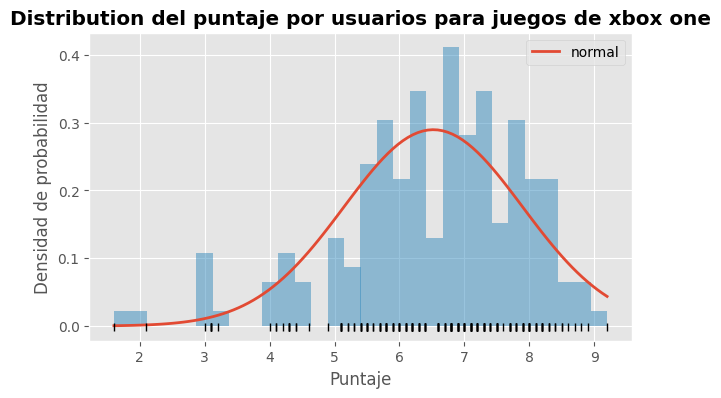

In [64]:
mu, sigma = st.norm.fit (xbox_rating)

x_hat = np.linspace (min(xbox_rating), max (xbox_rating), num=100)
y_hat = st.norm.pdf (x_hat, mu, sigma)

fig, ax = plt.subplots (figsize = (7,4))
plt.plot (x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist (x = xbox_rating, density=True, bins = 30, alpha = 0.5)
plt.plot (xbox_rating, np.full_like (xbox_rating, -0.001), "|k", markeredgewidth = 1)
plt.title ("Distribution del puntaje por usuarios para juegos de xbox one", fontdict={"weight": "bold"})
plt.xlabel ("Puntaje") 
plt.ylabel ("Densidad de probabilidad")
plt.legend ();

In [65]:
stat, p_value =  st.shapiro (xbox_rating)
print (f"Se rechaza la hipotesis nula de distribución normal con un p_value ={round (p_value, 4)}")

Se rechaza la hipotesis nula de distribución normal con un p_value =0.0


In [66]:
pc = data.query ("platform == 'PC'")
pc_rating = pc["user_score"].dropna ()

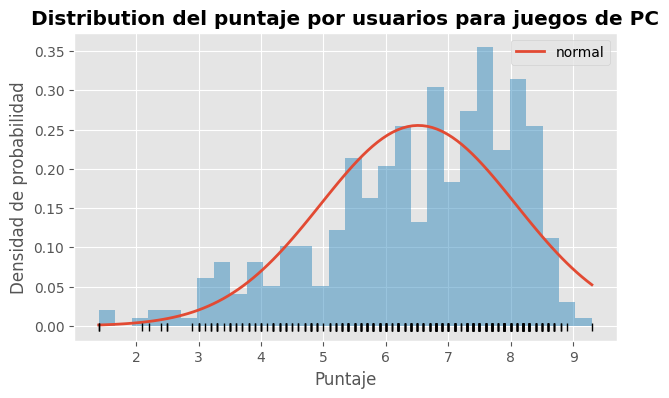

In [67]:
mu, sigma = st.norm.fit (pc_rating)

x_hat = np.linspace (min (pc_rating), max (pc_rating), num = 100)
y_hat = st.norm.pdf (x_hat, mu, sigma)

fig, ax = plt.subplots (figsize = (7,4))
plt.plot (x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist (x = pc_rating, density= True, bins = 30, alpha = 0.5)
plt.plot (pc_rating, np.full_like (pc_rating, -0.001), "|k", markeredgewidth = 1) 
plt.title ("Distribution del puntaje por usuarios para juegos de PC", fontdict={"weight":"bold"})
plt.xlabel ("Puntaje") 
plt.ylabel ("Densidad de probabilidad")
plt.legend ();

In [68]:
stat, p_value =  st.shapiro (pc_rating)
print (f"Se rechaza la hipotesis nula de distribución normal con un p_value ={round (p_value, 4)}")

Se rechaza la hipotesis nula de distribución normal con un p_value =0.0


A partir de los análisis de normalidad realizados (prueba de Shapiro-Wilk), se rechaza la hipótesis nula de que los puntajes de juegos para PC y Xbox One provienen de una distribución normal. Por esta razón, se recurre al uso de estadísticos no paramétricos. Dado que se comparan dos grupos independientes, se aplica la prueba Mann–Whitney U, adecuada para contrastar las diferencias en la distribución de los puntajes entre ambas plataformas.

Dado que no contamos con una hipótesis direccional previa sobre el comportamiento de los datos, se empleará la prueba Mann–Whitney U de dos colas. En este caso, las hipótesis a contrastar son:

- H₀: Las distribuciones de los puntajes por plataformas son iguales.

- H₁: Las distribuciones de los puntajes por plataformas son diferentes.

In [69]:
alpha = 0.01
stat, p_value = st.mannwhitneyu (xbox_rating, pc_rating)

if p_value < alpha: 
    print (f"Rechazamos la hipótesis nula con p_value = {round (p_value, 4)}")
else: 
    print (f"Aceptamos la hipótesis nula con p_value = {round (p_value, 4)}")

Aceptamos la hipótesis nula con p_value = 0.5563


La prueba de hipótesis mediante Mann–Whitney U de dos colas indica que no se rechaza la hipótesis nula, pues no se encontró evidencia estadísticamente significativa de diferencias en los puntajes entre las dos plataformas comparadas. Esto sugiere que el comportamiento de los puntajes de los usuarios se mantiene similar en ambas plataformas.

In [70]:
# Acción y deporte 

action = data.query ("genre == 'Action'")
action_rating = action ["user_score"].dropna()

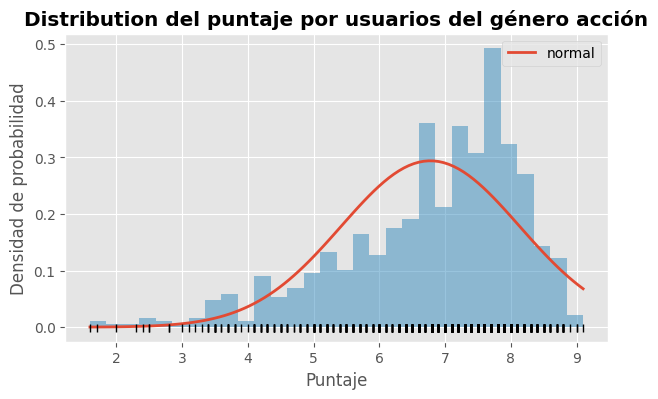

In [71]:
mu, sigma = st.norm.fit (action_rating)
x_hat = np.linspace (min(action_rating), max (action_rating), num = 100)
y_hat = st.norm.pdf (x_hat, mu, sigma) 

fig, ax = plt.subplots (figsize = (7,4))
plt.plot (x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist (x = action_rating, density= True, bins = 30, alpha= 0.5)
plt.plot (action_rating, np.full_like (action_rating, -0.001), "|k", markeredgewidth = 1)
plt.title ("Distribution del puntaje por usuarios del género acción", fontdict={"weight":"bold"})
plt.xlabel ("Puntaje") 
plt.ylabel ("Densidad de probabilidad")
plt.legend ();

In [72]:
stat, p_value =  st.shapiro (action_rating)
print (f"Se rechaza la hipotesis nula de distribución normal con un p_value ={round (p_value, 4)}")

Se rechaza la hipotesis nula de distribución normal con un p_value =0.0


In [73]:
sports = data.query ("genre == 'Sports'")
sports_rating = sports["user_score"].dropna()

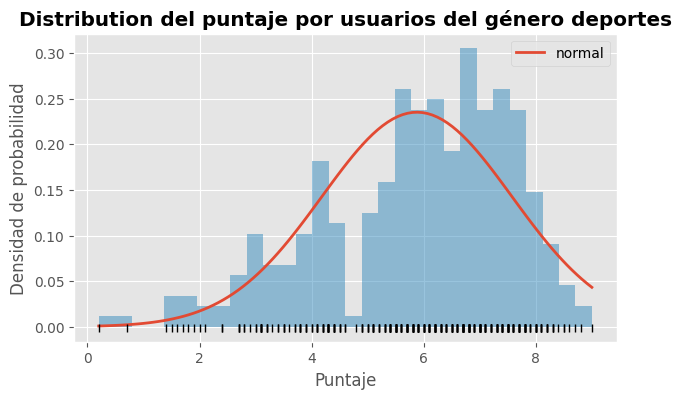

In [74]:
mu, sigma = st.norm.fit (sports_rating)
x_hat = np.linspace (min (sports_rating), max (sports_rating), num = 100)
y_hat = st.norm.pdf (x_hat, mu, sigma) 

fig, ax = plt.subplots (figsize = (7,4))
plt.plot (x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist (x = sports_rating, density= True, bins = 30, alpha = 0.5)
plt.plot (sports_rating, np.full_like (sports_rating, -0.001), "|k", markeredgewidth = 1)
plt.title ("Distribution del puntaje por usuarios del género deportes", fontdict={"weight":"bold"})
plt.xlabel ("Puntaje") 
plt.ylabel ("Densidad de probabilidad")
plt.legend ();

In [75]:
stat, p_value =  st.shapiro (sports_rating)
print (f"Se rechaza la hipotesis nula de distribución normal con un p_value ={round (p_value, 4)}")

Se rechaza la hipotesis nula de distribución normal con un p_value =0.0


A partir de los análisis de normalidad realizados mediante la prueba de Shapiro-Wilk, se rechaza la hipótesis nula de que los puntajes de juegos de los géneros acción y deportes siguen una distribución normal. Por esta razón, se recurre al uso de estadísticos no paramétricos. Dado que se comparan dos grupos independientes, se aplica la prueba Mann–Whitney U, adecuada para contrastar las diferencias en la distribución de los puntajes entre ambos géneros.

Dado que no contamos con una hipótesis direccional previa sobre el comportamiento de los datos, se empleará la prueba Mann–Whitney U de dos colas. En este caso, las hipótesis a contrastar son:

- H₀: Las distribuciones de los puntajes por géneros son iguales.

- H₁: Las distribuciones de los puntajes por géneros son diferentes.

In [76]:
alpha = 0.01
stat, p_value = st.mannwhitneyu (action_rating, sports_rating)

if p_value < alpha: 
    print (f"Rechazamos la hipótesis nula con p_value = {round (p_value, 4)}")
else: 
    print (f"Aceptamos la hipótesis nula con p_value = {round (p_value, 4)}")

Rechazamos la hipótesis nula con p_value = 0.0


Dado que el p-valor = 0.0 < α = 0.01, se rechaza la hipótesis nula y se concluye que los puntajes individuales por género son significativamente diferentes.

# Conclusión General

El análisis de los datos de ventas y reseñas de videojuegos permitió identificar los principales factores asociados al éxito comercial y proyectar estrategias de marketing para 2017.

En primer lugar, se comprobó que el ciclo de vida promedio de las plataformas oscila entre 6 y 8 años, lo que justificó tomar como ventana de estudio el período 2010–2016. Esto permitió detectar qué consolas mantenían relevancia al cierre de 2016 y cuáles mostraban un declive irreversible. En este sentido, PlayStation 4 y Xbox One se perfilan como las plataformas con mayor potencial de crecimiento, mientras que consolas de séptima generación (PS3, Xbox 360, Wii) ya entraron en fase de declive. El PC constituye un caso particular, al mantenerse como plataforma atemporal gracias a la actualización constante de hardware.

En cuanto a los géneros, Acción, Shooter y Deportes concentran la mayor parte de las ventas, aunque su éxito está fuertemente vinculado al volumen de títulos lanzados más que a una ventaja inherente del género. Se observaron además picos de ventas asociados a títulos sobresalientes que generan outliers positivos dentro de cada categoría.

El análisis regional mostró diferencias notables:  
- **Norteamérica**: preferencia marcada por Xbox 360 en el histórico, aunque con transición hacia PS4 y Xbox One.  
- **Europa**: dominio de PlayStation y un papel más relevante del PC.  
- **Japón**: liderazgo de consolas portátiles (3DS, PSV), con oportunidades de crecimiento para PS4.  

Respecto a la influencia de reseñas, los resultados indican que los puntajes de los usuarios tienen escasa relación con las ventas, mientras que las valoraciones de la crítica muestran una correlación moderada y positiva, lo que sugiere que pueden ser un factor de apoyo en el éxito de un título, aunque no determinante.  

Finalmente, las pruebas de hipótesis confirmaron que no existen diferencias significativas en las valoraciones de usuarios entre PC y Xbox One, mientras que sí se observaron diferencias estadísticamente significativas entre los géneros Acción y Deportes, lo que indica que los jugadores tienden a valorar de forma distinta estos tipos de juegos.

En conjunto, el estudio sugiere que la estrategia más prometedora para 2017 consiste en:  
- **NA y EU**: reforzar campañas en torno a PS4 y Xbox One.  
- **JP**: priorizar portátiles y consolidar PS4 como consola de sobremesa.  
- **Global**: centrar esfuerzos en PlayStation 4 como la única plataforma con tendencia positiva en todas las regiones.  

De esta forma, se lograron identificar patrones claros de éxito en el mercado, construir perfiles regionales diferenciados y respaldar con evidencia estadística las decisiones estratégicas de la compañía.
